In [10]:
%load_ext autoreload
%autoreload 2


import numpy as np
import sys

import matplotlib.pyplot as plt  
import seaborn as sns
import figures as figs
import calculations
from types import SimpleNamespace
import pandas as pd

# Ploting jacobians wrt ptilde
from matplotlib.ticker import FormatStrFormatter

import gc  # For garbage collection
import itertools


from seaborn import set_palette
from matplotlib import rc
plt.style.use('seaborn-v0_8-white')
set_palette("colorblind")
rc('font',**{'family':'serif','serif': ['Palatino']})
rc('text',usetex=True)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

# Should make insure text size in latex mode
# plt.rcParams.update({
#     "text.latex.preamble": r"\usepackage{palatino} \normalsize"
# })

from IHANKModel import IHANKModelClass



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
model = IHANKModelClass()
save_figs = True
shock = calculations.difine_shocks(model, scale=0.05, rho = 0.8)[0]

In [12]:
model_baseline = model.copy(name='Non-Homothetic Preferences')
# model_baseline.par.gamma = model_baseline.par.epsilon
model_baseline.find_ss()
model_baseline.compute_jacs(do_print=False)
model_baseline.find_transition_path(shocks=shock, do_end_check=False)

: 

In [8]:
model_homothetic = model.copy(name='Homothetic Preferences')
model_homothetic.par.epsilon = 0.0
model_homothetic.par.gamma = 0.18
# model_homothetic.par.gamma = 0.055
model_homothetic.find_ss()
model_homothetic.compute_jacs()
model_homothetic.find_transition_path(shocks=shock, do_end_check=False)

In [9]:
models = [model_baseline, model_homothetic]

# Basics

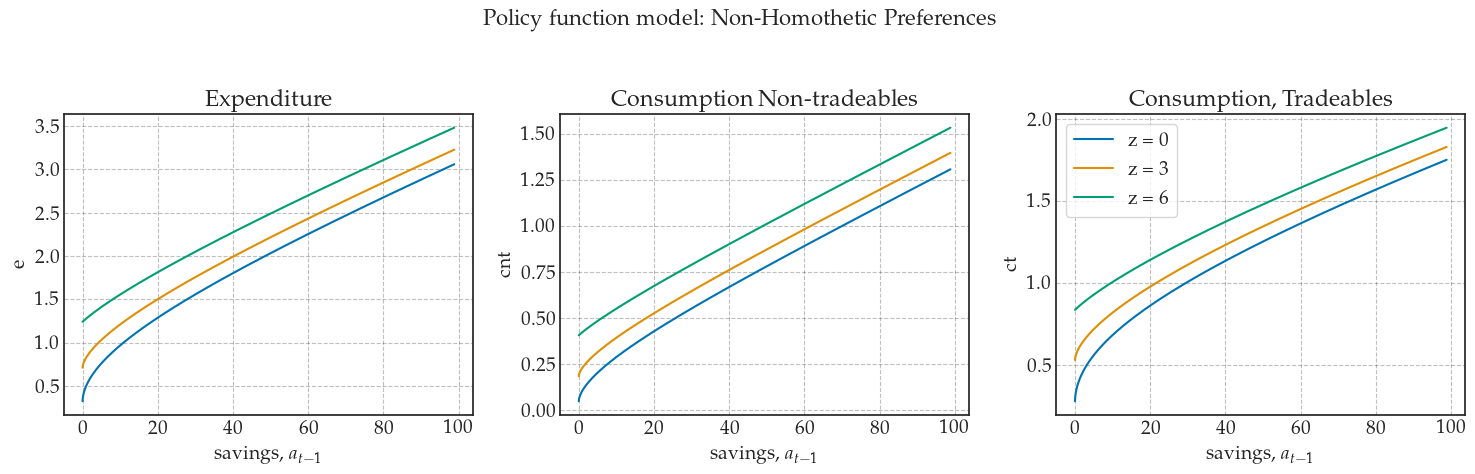

In [6]:
fig = figs.plot_policy(model_baseline, ['e', 'cnt', 'ct'])
if save_figs: fig.savefig('plots/policy.png', dpi=300, bbox_inches='tight')


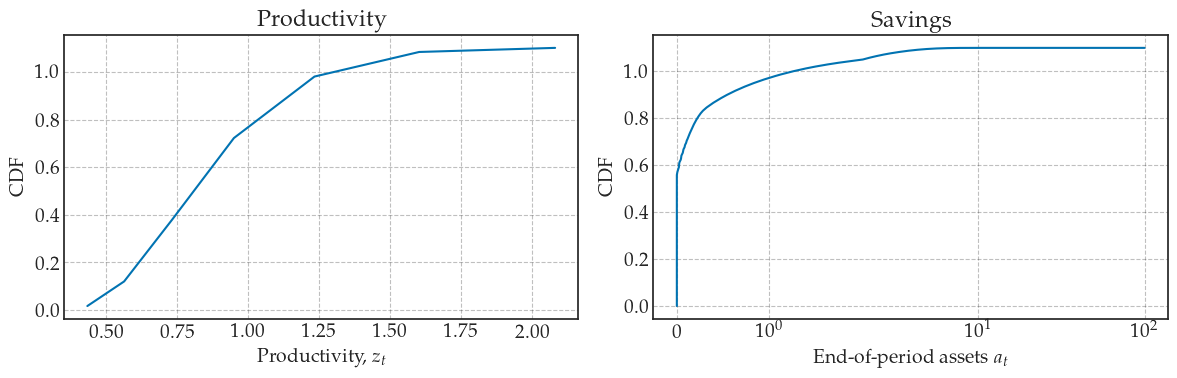

In [7]:
fig = figs.cum_z_a(model_baseline)
if save_figs: fig.savefig('plots/cum_z_a.png', dpi=300, bbox_inches='tight')


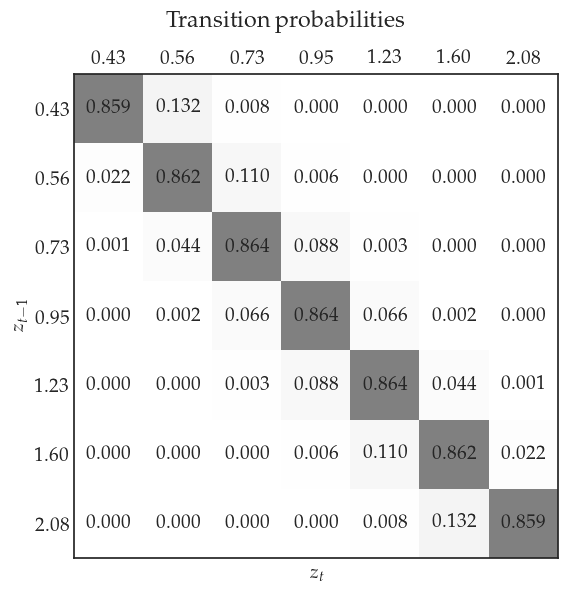

In [8]:
fig = figs.plot_trans_matrix(model_baseline)
if save_figs: fig.savefig('plots/z_trans.png', dpi=300, bbox_inches='tight')

# Shock 


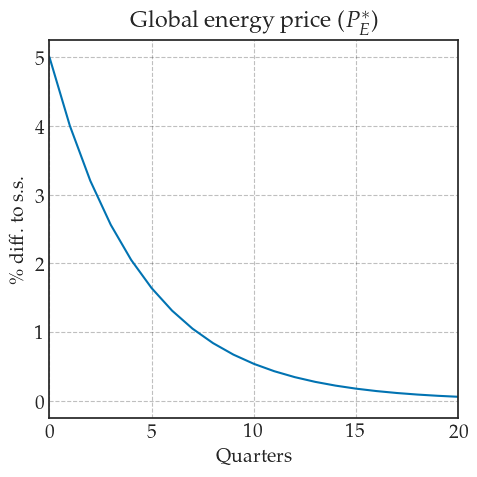

In [9]:
fig = figs.plot_PE_s(model_baseline)
if save_figs: fig.savefig('plots/PE_shock.png', dpi=300, bbox_inches='tight')

# Jacobians 

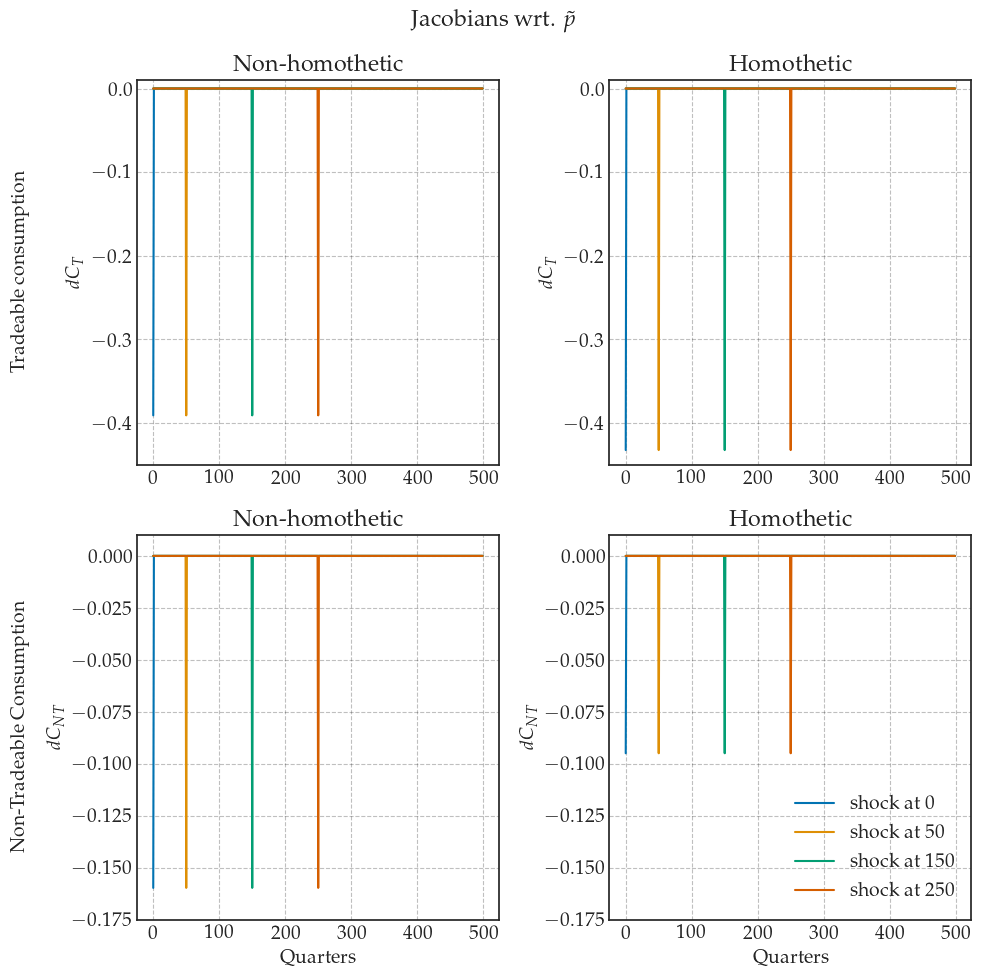

In [10]:
fig = figs.plot_jac_p(models)
if save_figs: fig.savefig('plots/jac_p.png', dpi=300, bbox_inches='tight')

# IRF's

### All

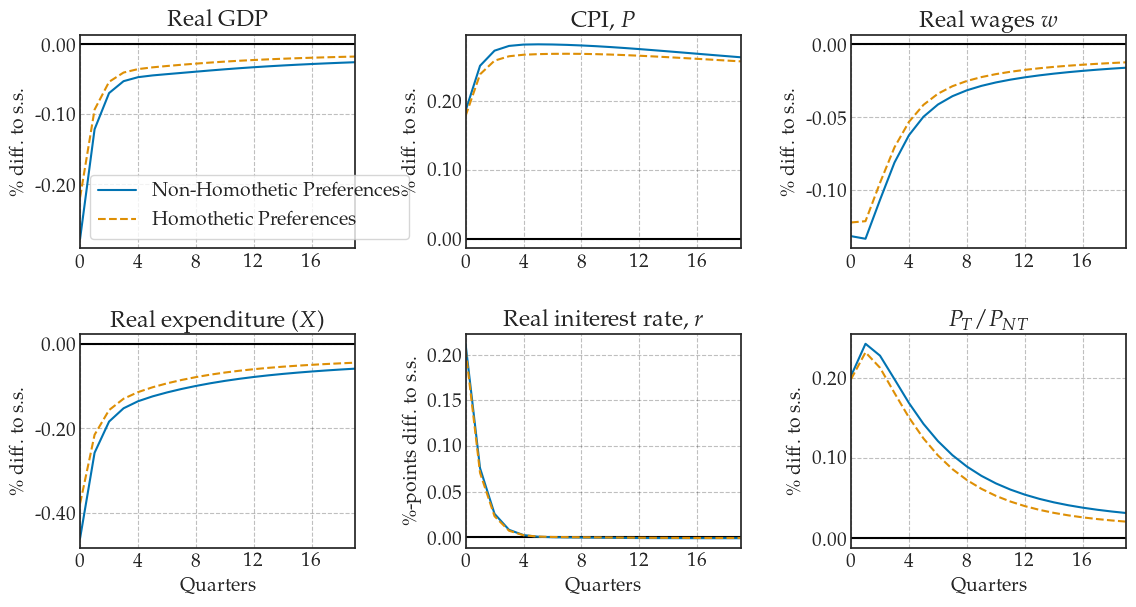

In [11]:
paths_ = ['YH', 'P', 'w','X','r_real', 'p' ]
fig = figs.show_IRFs(models, paths_)
if save_figs: fig.savefig('plots/IRFs_main.png', dpi=300, bbox_inches='tight')

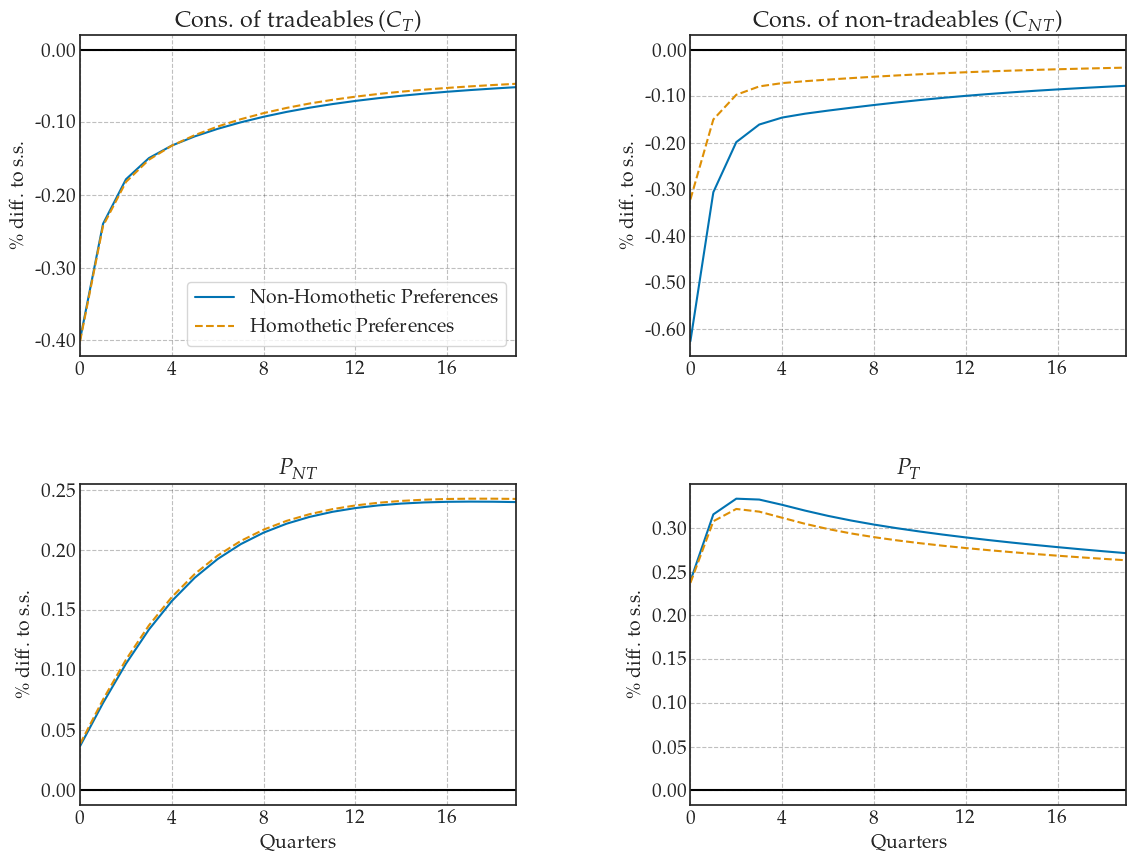

In [12]:
paths_ = ['CT_hh', 'CNT_hh', 'PNT', 'PT']
fig =  figs.show_IRFs([model_baseline, model_homothetic], paths_, maxcol=2)
if save_figs: fig.savefig(f'plots/IRFs_c.png', dpi=300, bbox_inches='tight')

### IRF's prices

In [ ]:

fig =  figs.show_pc_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_pc_all.png', dpi=300, bbox_inches='tight')



fig =  figs.show_price_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_p_all.png', dpi=300, bbox_inches='tight')



fig =  figs.show_c_IRFs(model_baseline)
if save_figs: fig.savefig(f'plots/IRFs_c_all.png', dpi=300, bbox_inches='tight')


# for model in models:
#     fig =  figs.show_price_IRFs(model)
#     if save_figs: fig.savefig(f'plots/P_{model.name}.png')   
#     fig = figs.show_c_IRFs(model)
#     if save_figs: fig.savefig(f'plots/c_{model.name}.png')


# Importance of epsilon 

In [ ]:
model_e1 = IHANKModelClass(name='epsion = 0.10')
model_e1.par.epsilon = 0.10
# model_e1.par.gamma = 0.24
model_e1.find_ss()
model_e1.compute_jacs()
model_e1.find_transition_path(shocks=shock, do_end_check=False)

model_e05 = IHANKModelClass(name='epsion = 0.05')
model_e05.par.epsilon = 0.05
# model_e05.par.gamma = 0.21
model_e05.find_ss()
model_e05.compute_jacs()
model_e05.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
model_e00 = IHANKModelClass(name='epsion = 0.00')
model_e00.par.epsilon = 0.00
# model_e00.par.gamma = 0.21
model_e00.find_ss()
model_e00.compute_jacs()
model_e00.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
models = [model_baseline,  model_e1, model_e05 , model_e00]#, model_homothetic]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'cov = {model_i.cov_e_omegaT:.3f}'
    
colors_reds = sns.color_palette("Reds", n_colors=5)
fig = figs.show_IRFs(models, paths=['P', 'X', 'CT', 'CNT' ], colors = colors_reds, maxcol=2)
# if save_figs: fig.savefig('plots/IRF_epsion.png', dpi=300, bbox_inches='tight')

In [ ]:


def show_IRFs(models, colors):

    ncols = 2
    nrows = 2
    T_max = 17
    linewidth= 1.0

    fig = plt.figure(figsize=(4.3*ncols/1.1,3.6*nrows/1.2),dpi=100)
    # Tradable and  non-tradable
    # fig.suptitle(f'{model[0].name}, Consumption Response', fontsize=20)
    
    ax = fig.add_subplot(nrows,ncols,1)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.P-model.ss.P)/model.ss.P-1)*100,label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('CPI (P)')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,2)    
    for model in models: 
        ax.plot(((model.path.X-model.ss.X)/model.ss.X-1),label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Real Expenditure')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))
    
    ax = fig.add_subplot(nrows,ncols,3)   
    for i, model in enumerate(models): 
    # ax.plot((model.path.p-model.ss.p),label='$p$', linewidth=linewidth)
        ax.plot(((model.path.CT-model.ss.CT)/model.ss.CT-1),label='$C_T$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT),ls='--',label='$C_{NT}$', linewidth=linewidth)
    # ax.plot((model.path.PNT-model.ss.PNT),ls=':',label='$P_{NT}$', linewidth=linewidth)
    ax.set_xlim([0,T_max])
    ax.set_ylabel('\% diff. to s.s.')
    # ax.legend()
    ax.set_title('Cons. Tradable goods')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))

    # Energy and non energy tradable 
    ax = fig.add_subplot(nrows,ncols,4)    
    for model in models: 
        ax.plot(((model.path.CNT-model.ss.CNT)/model.ss.CNT-1)*100,label='$C_E$', linewidth=linewidth, color= colors[i])
        # ax.plot(((model.path.CTHF-model.ss.CTHF)/model.ss.CTHF),ls='--',label='$C_{goods}$', linewidth=linewidth)
    # ax.plot((model.path.PE-model.ss.PE),ls=':',label='$P_{Energy}$', linewidth=linewidth)
    ax.set_ylabel('\% diff. to s.s.')
    ax.set_xlim([0,T_max])
    # ax.legend()
    ax.set_title('Cons. Non-tradable services')
    ax.set_xlabel('Quarters')
    ax.set_xticks(np.arange(0,T_max,4))


    fig.tight_layout()

    return fig

colors_reds = sns.color_palette("Reds", n_colors=4)
models = [model_baseline, model_homothetic]
fig = show_IRFs(models, colors_reds)

# Importance of eta 

In [ ]:
model_g29 = model_baseline.copy()


In [ ]:
model_g40 = IHANKModelClass(name='gamma = 0.40')
model_g40.par.gamma = 0.40
model_g40.find_ss()
model_g40.compute_jacs()
model_g40.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
model_g20 = IHANKModelClass(name='gamma = 0.20')
model_g20.par.gamma = 0.20
model_g20.find_ss()
model_g20.compute_jacs()
model_g20.find_transition_path(shocks=shock, do_end_check=False)

In [ ]:
models = [model_g20, model_baseline,  model_g40]
for model_i in models:
    model_i.calc_additional_new()
    model_i.name = f'eta = {model_i.par.eta_T_RA:.3f}'
    
colors_reds = sns.color_palette("Reds", n_colors=3)
path_eta = ['CT', 'CNT', 'YH', 'X'] 
fig = figs.show_IRFs(models, path_eta, colors = colors_reds, maxcol=2)
if save_figs: fig.savefig('plots/IRF_gamma.png', dpi=300, bbox_inches='tight')

# Effect of real wage stabilisation motive 

In [ ]:
model_no_ws = IHANKModelClass(name='No Wage Stabilization motive')
model_no_ws.par.real_wage_motive = 0.0
model_no_ws.find_ss()
model_no_ws.compute_jacs()
model_no_ws.find_transition_path(shocks=shock, do_end_check=False)


In [ ]:
paths_wage_stabilisation = ['W', 'P', 'w', 'inc', 'INC', 'X']
model_baseline.name = 'Baseline'
model_no_ws.name = 'No Wage Stabilization'
fig = figs.show_IRFs([model_baseline, model_no_ws], paths_wage_stabilisation, maxcol=2)
# if save_figs: fig.savefig('plots/senesitivity_wage_stabilization.png', dpi=300, bbox_inches='tight')

# Correlations

In [ ]:
# model_baseline.calc_additional_new()
fig = figs.plot_cor_e(model_baseline)
if save_figs: fig.savefig('plots/cor_e.png', dpi=300, bbox_inches='tight')

# Forigne economy 

In [ ]:
# paths_fogine = ['i', 'r_real', 'E', 'Q', 'PTH', 'CTH_s' ]
# figs = figs.show_IRFs()

# No wage stabilisation motive

In [ ]:
model_no_ws = IHANKModelClass(name='High eta')
model_no_ws.par.wage_stabilization = 0.0
model_no_ws.find_ss()
model_no_ws.compute_jacs()
model_no_ws.find_transition_path(shocks=shock, do_end_check=False)

fig = figs.show_IRFs([model_baseline, model_no_ws], model.varlist, maxcol=3)



# Other elasticities of substitution

### Eta E

In [ ]:
model_etaE05 = IHANKModelClass(name= 'Eta = 0.5')
model_etaE05.par.etaE = 0.5
model_etaE05.find_ss()
model_etaE05.compute_jacs()
model_etaE05.find_transition_path(shock, do_end_check=False)

In [ ]:
model_etaE2 = IHANKModelClass(name= 'Eta = 2')
model_etaE2.par.etaE = 2.0
model_etaE2.find_ss()
model_etaE2.compute_jacs()
model_etaE2.find_transition_path(shock, do_end_check=False)


In [ ]:
model_etaE5 = IHANKModelClass(name= 'Eta = 5')
model_etaE5.par.etaE = 5.0
model_etaE5.find_ss()
model_etaE5.compute_jacs()
model_etaE5.find_transition_path(shock, do_end_check=False)


In [ ]:
model_baseline.name = 'eta = 0.1'
models = [model_baseline, model_etaE05 , model_etaE2, model_etaE5]
paths_ = ['CE', 'X']
fig = figs.show_IRFs(models, paths_)
if save_figs: fig.savefig('plots/eta_E.png', dpi=300, bbox_inches='tight')

### Eta F and eta S 

In [ ]:
model_etaF1 = IHANKModelClass(name= 'Eta = 1.0')
model_etaF1.par.etaF = 1.0
model_etaF1.par.eta_s = 1.0
model_etaF1.find_ss()
model_etaF1.compute_jacs()
model_etaF1.find_transition_path(shock, do_end_check=False)

In [ ]:
model_etaF2 = IHANKModelClass(name= 'Eta = 2.0')
model_etaF2.par.etaF = 2.0
model_etaF2.par.eta_s = 2.0
model_etaF2.find_ss()
model_etaF2.compute_jacs()
model_etaF2.find_transition_path(shock, do_end_check=False)

In [ ]:
model_etaF5 = IHANKModelClass(name= 'Eta = 3.0')
model_etaF5.par.etaF = 3.0
model_etaF5.par.eta_s = 3.0
model_etaF5.find_ss()
model_etaF5.compute_jacs()
model_etaF5.find_transition_path(shock, do_end_check=False)

In [ ]:
model_baseline.name = 'eta = 0.5'
models = [model_baseline, model_etaF1 , model_etaF2, model_etaF5]

paths_ = ['PTH', 'E', 'PTH_s', 'CTH', 'CTF', 'CTH_s' , 'X', 'PF']
# paths_ = [ 'CTH', 'CTF', 'CTH_s' , 'X']
fig = figs.show_IRFs(models, paths_)
# if save_figs: fig.savefig('plots/eta_F.png', dpi=300, bbox_inches='tight')

# Cohorts

In [ ]:
fig = figs.IRF_cohort(model_baseline, shock)

In [ ]:



import gc  # For garbage collection
import itertools


model = model_baseline
model_homo= model_homothetic
T_max=16

states = {
        'Poor household': [0, 0, 0],   # original values
        'Rich household': [0, 6, 300]
    }

# Precompute SS and JAC once for each base model
model_base = model.copy(name='Baseline')
model_base.find_ss()
model_base.compute_jacs()

if model_homo != None:
    model_base_homo = model_homo.copy(name='Baseline Homo')
    model_base_homo.find_ss()
    model_base_homo.compute_jacs()

# Initialize result dictionaries
CT_diff, CNT_diff, E_hh_diff, Q_diff, X_diff = {}, {}, {}, {}, {}
CT_diff_homo, CNT_diff_homo, E_hh_diff_homo, Q_diff_homo, X_diff_homo = {}, {}, {}, {}, {}

for state in states:
    # === Build normalized Dbeg_choice using both 0 and 1 in the first dimension
    s0, s1, s2 = states[state]
    Dbeg_choice = np.zeros(model.ini.Dbeg.shape)
    for i in [0, 1]:
        Dbeg_choice[i, s1, s2] = 1.0
    Dbeg_choice /= Dbeg_choice.sum()

    # === Standard model
    model_ns = model_base.copy(name='NoShock')
    model_ns.find_transition_path(shocks=[])
    model_ns.simulate_hh_path(Dbeg=Dbeg_choice)
    model_ns.calc_additional_new()

    model_s = model_base.copy(name='Shock')
    model_s.find_transition_path(shocks=shock, do_end_check=False)
    model_s.simulate_hh_path(Dbeg=Dbeg_choice)
    model_s.calc_additional_new()

    CT_diff[state] = (model_s.path.CT_hh - model_ns.path.CT_hh) / model_ns.path.CT_hh * 100
    CNT_diff[state] = (model_s.path.CNT_hh - model_ns.path.CNT_hh) / model_ns.path.CNT_hh * 100
    E_hh_diff[state] = (model_s.path.E_hh - model_ns.path.E_hh) / model_ns.path.E_hh * 100
    Q_diff[state] = (model_s.path.Q_hh - model_ns.path.Q_hh) / model_ns.path.Q_hh * 100
    X_diff[state] = (model_s.path.X_hh - model_ns.path.X_hh) / model_ns.path.X_hh * 100

    del model_ns, model_s
    gc.collect()

    if model_homo != None:

        # === Homo model
        model_ns_homo = model_base_homo.copy(name='NoShock Homo')
        model_ns_homo.find_transition_path(shocks=[])
        model_ns_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_ns_homo.calc_additional_new()

        model_s_homo = model_base_homo.copy(name='Shock Homo')
        model_s_homo.find_transition_path(shocks=shock, do_end_check=False)
        model_s_homo.simulate_hh_path(Dbeg=Dbeg_choice)
        model_s_homo.calc_additional_new()

        CT_diff_homo[state] = (model_s_homo.path.CT_hh - model_ns_homo.path.CT_hh) / model_ns_homo.path.CT_hh * 100
        CNT_diff_homo[state] = (model_s_homo.path.CNT_hh - model_ns_homo.path.CNT_hh) / model_ns_homo.path.CNT_hh * 100
        E_hh_diff_homo[state] = (model_s_homo.path.E_hh - model_ns_homo.path.E_hh) / model_ns_homo.path.E_hh * 100
        Q_diff_homo[state] = (model_s_homo.path.Q_hh - model_ns_homo.path.Q_hh) / model_ns_homo.path.Q_hh * 100
        X_diff_homo[state] = (model_s_homo.path.X_hh - model_ns_homo.path.X_hh) / model_ns_homo.path.X_hh * 100

        del model_ns_homo, model_s_homo
        gc.collect()

# === Plotting

fig = plt.figure(figsize=(10, 6))
ncols, nrows = 2, 2

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

def plot_panel(ax, title, diff, diff_homo):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state} inc (Non-homothetic)', linestyle='-', color=color)
        if model_homo != None:
            ax.plot(diff_homo[state][:T_max], label=f'{state} inc (Homothetic)', linestyle='--', color=color)
    ax.set_xlabel('Quarters')
    ax.set_ylabel('% diff. to s.s.')


# Plot layout
ax0 = fig.add_subplot(nrows, ncols, 4)
plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)


ax1 = fig.add_subplot(nrows, ncols, 3)
plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

ax2 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax2, 'P', Q_diff, Q_diff_homo)

ax3 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax3, 'X', X_diff, X_diff_homo)

# legened outside box 
ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout(rect=[0, 0, 0.85, 1])



In [ ]:


fig = plt.figure(figsize=(10, 5))
ncols, nrows = 2, 1

model_homo = X_diff_homo

# Assign consistent colors to states using a colormap
color_cycle = itertools.cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
state_colors = {state: next(color_cycle) for state in states}

def plot_panel(ax, title, diff, diff_homo):
    ax.set_title(title)
    for state in states:
        color = state_colors[state]
        ax.plot(diff[state][:T_max], label=f'{state}', linestyle='-', color=color)
        if model_homo != None:
            ax.plot(diff_homo[state][:T_max], label=f'{state} (Homothetic)', linestyle='--', color=color)
    ax.set_xlabel('Quarters')
    ax.set_ylabel(r'\% diff. to s.s.')


# Plot layout
# ax0 = fig.add_subplot(nrows, ncols, 4)
# plot_panel(ax0, 'Consumption T', CT_diff, CT_diff_homo)


# ax1 = fig.add_subplot(nrows, ncols, 3)
# plot_panel(ax1, 'Consumption NT', CNT_diff, CNT_diff_homo)

ax1 = fig.add_subplot(nrows, ncols, 1)
plot_panel(ax1, 'Cost-of-living ($p_{it}$)', Q_diff, Q_diff_homo)

# ax2 = fig.add_subplot(nrows, ncols, 2)
# plot_panel(ax2, 'E', E_hh_diff, E_hh_diff_homo)


ax3 = fig.add_subplot(nrows, ncols, 2)
plot_panel(ax3, 'Real expenditure $X_{it}$', X_diff, X_diff_homo)

ax1.legend()

# legened outside box 
# ax0.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()


# Monetary Policy 